# Lecture 12 Exercise 2

Derive the following discriminator dependence on code phase error:

$$
l_{\Delta \eta} = \delta\eta \cdot \frac{|Z_E| - |Z_L|}{|Z_E| + |Z_L| + 2|Z_P|}
$$


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import utils.signals.gps_l1ca as gps_l1ca

true_code_phase_chips = np.arange(-1.5, 1.5, 0.01)
bpsk_autocorr_func = lambda dchips: np.maximum(0, 1 - np.abs(dchips))
bpsk_autocorr = bpsk_autocorr_func(true_code_phase_chips)

corr_chip_offsets = [-0.5, 0.0, 0.5]
chip_labels = ["Early", "Prompt", "Late"]
label_offsets = [(30, 5), (35, -10), (-30, 5)]

code_phase_error = np.arange(-1.0, 1.0, 0.01)
expected_corr_values = [bpsk_autocorr_func(code_phase_error + chip_offset) for chip_offset in corr_chip_offsets]
early, prompt, late = expected_corr_values
discr_1_outputs = 2 * 0.5 * (early - late) / (early + late + 2 * prompt)
discr_2_outputs = (early**2 - late**2) / 2
discr_3_outputs = 0.5 * (early - late) / (early + late)


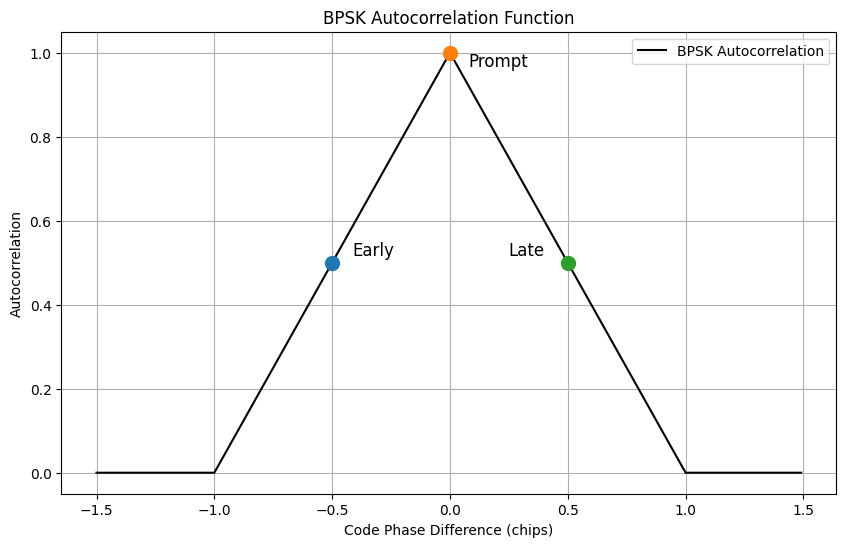

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(true_code_phase_chips, bpsk_autocorr, label="BPSK Autocorrelation", color="k")

for chip_offset, label, label_offset in zip(corr_chip_offsets, chip_labels, label_offsets):
    ax.plot([chip_offset], [bpsk_autocorr_func(chip_offset)], "o", markersize=10)
    ax.annotate(label, xy=(chip_offset, bpsk_autocorr_func(chip_offset)),
                textcoords="offset points", xytext=label_offset, ha="center", fontsize=12)
ax.set_title("BPSK Autocorrelation Function")
ax.set_xlabel("Code Phase Difference (chips)")
ax.set_ylabel("Autocorrelation")
ax.grid(True)
ax.legend()
plt.show()

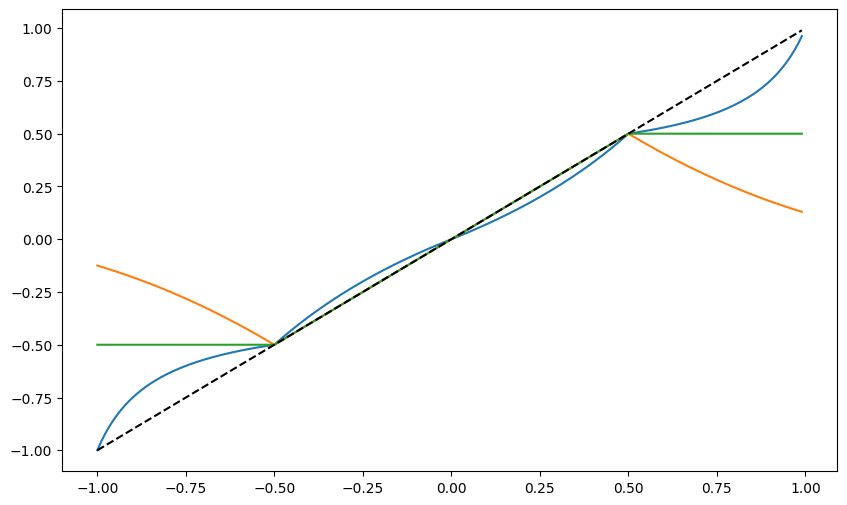

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
for i, discr_outputs in enumerate([discr_1_outputs, discr_2_outputs, discr_3_outputs], start=1):
    ax.plot(code_phase_error, discr_outputs, label=f"Discriminator {i} Output")
ax.plot(code_phase_error, code_phase_error, color="k", linestyle="--")
ax.grid()
plt.show()